<a href="https://colab.research.google.com/github/jwindischbauer/CoderHouse/blob/main/Proyecto_Final_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Proyecto final***

*Encuesta satisfaccion de clientes de una aerolinea*

---



In [1]:
# Importacion de las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
# Lectura del archivo
df = pd.read_csv("/content/Encuesta satisfaccion aerolinea.csv", sep=';')

# Visualizacion de las 3 primeras filas del archivo
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [131]:
#Eljo una paleta de colores predeterminada
color = 'PRGn' # set palette color (from PALETTE_COLOR)
sns.set_palette(color) # set palette

# ***Data Wrangling***
*Información de la base de datos*

---

In [ ]:
# Tamaño del archivo
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

El archivo tiene 25976 filas y 25 columnas


In [4]:
# Identificacion de tipos de variables y el recuento de no nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
# Visualizacion de las columnas
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [32]:
# Eliminacion de los campos indispensables y renombre de la columna Leg room service
df = df.drop(['Unnamed: 0', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient'], axis=1)
df = df.set_index('id', drop=True, append=False, inplace=False) #Pongo el id como indice
df.rename(columns={'Leg room service':'Seat space'}, inplace=True) #Cambio los nombres de las columnas
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Seat space,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,3,4,3,4,3,5,5,5,5,2,5,5,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,3,1,5,4,5,4,4,4,4,3,4,5,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,2,4,2,2,2,2,4,1,3,2,2,2,neutral or dissatisfied


In [ ]:
# Visualizacion de las columnas del nuevo data frame
print(df.columns)
print('')
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

El archivo tiene 25976 filas y 25 columnas


In [ ]:
# Revision de valores misssings o nulos 
df.isnull().sum()

Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Gate location             0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Seat space                0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

In [33]:
# Agrupacion de campos por tipo de dato
col_numerica = df.select_dtypes(['int64']).columns

col_categorica = df.select_dtypes(['object']).columns

variables = ['Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort','Inflight entertainment',  
'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

In [34]:
# Descripcion de las variables numericas
df[col_numerica].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0
On-board service,25976.0,3.385664,1.282088,0.0,2.0,4.0,4.0,5.0


In [35]:
# Descripcion de las variables categoricas
df[col_categorica].describe().T

,count,unique,top,freq
Gender,25976,2,Female,13172
Customer Type,25976,2,Loyal Customer,21177
Type of Travel,25976,2,Business travel,18038
Class,25976,3,Business,12495
satisfaction,25976,2,neutral or dissatisfied,14573


In [55]:
# Descripción de las variables en clientes satisfechos
df_satisfied = df[df['satisfaction'] == 'satisfied']
print('Descripción de las variables categóricas en clientes satisfechos')
print(df_satisfied[df_satisfied[col_categorica].columns.difference(['satisfaction'])].describe().T)

print('\n\nDescripción de las variables numéricas en clientes satisfechos')
print(df_satisfied[col_numerica].describe().T)

Descripción de las variables categóricas en clientes satisfechos
                count unique              top   freq
Class           11403      3         Business   8686
Customer Type   11403      2   Loyal Customer  10195
Gender          11403      2           Female   5735
Type of Travel  11403      2  Business travel  10610


Descripción de las variables numéricas en clientes satisfechos
                          count         mean          std   min    25%  \
Age                     11403.0    41.703236    12.915298   7.0   32.0   
Flight Distance         11403.0  1527.165746  1125.548796  31.0  521.0   
Inflight wifi service   11403.0     3.148031     1.598657   0.0    2.0   
Ease of Online booking  11403.0     3.008682     1.589303   0.0    2.0   
Gate location           11403.0     2.952995     1.374550   1.0    2.0   
Food and drink          11403.0     3.541787     1.229884   0.0    3.0   
Online boarding         11403.0     4.019469     1.211304   0.0    4.0   
Seat comfort 

In [36]:
# Visualizacion del recuento de respuestas
for x in col_categorica:
  print(str(x))
  frecuencia_valores = df[x].value_counts()
  print(frecuencia_valores)
  print("\n")

Gender
Female    13172
Male      12804
Name: Gender, dtype: int64


Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64


Type of Travel
Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64


Class
Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64


satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64




In [98]:
# Creo un nuevo dataframe
df2 = df.copy()

# Uso LabelEncoder para convertir las variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder

for x in col_categorica:
    print(str(x))
    le = LabelEncoder()
    le.fit(df2[str(x)])
    df2[str(x)] = le.transform(df2[str(x)]) 
    
    frecuencia_valores = df2[x].value_counts()
    print(frecuencia_valores)
    print("\n")

Gender
0    13172
1    12804
Name: Gender, dtype: int64


Customer Type
0    21177
1     4799
Name: Customer Type, dtype: int64


Type of Travel
0    18038
1     7938
Name: Type of Travel, dtype: int64


Class
0    12495
1    11564
2     1917
Name: Class, dtype: int64


satisfaction
0    14573
1    11403
Name: satisfaction, dtype: int64




In [99]:
# Agrupacion de campos por tipo de dato
variables_total = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness',
                   'Gender', 'Customer Type', 'Type of Travel','Class','satisfaction'] # Se asignan todos los campos requeridos a una unica variable

# ***Análisis de la base de datos***

---

*Analisis univariado*

---



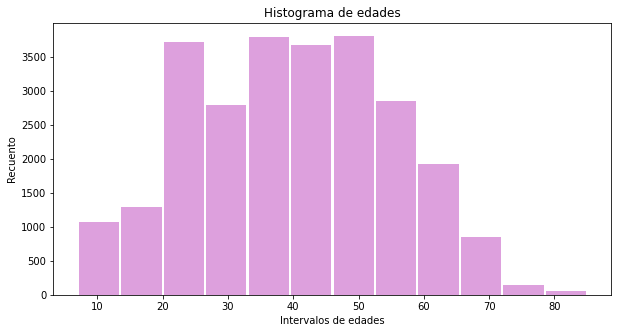

In [142]:
# Distribucion de edades
datos = df['Age'] #asignacion de la columna edad a una variable
datos_norm = datos.values.flatten() #normalizacion de los datos
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(datos_norm, bins=12, rwidth=0.95, color='plum') # se grafican los valores 
ax.set_title('Histograma de edades') #se pone titulo al grafico
ax.set_xlabel('Intervalos de edades') #se pone nombre al eje x
ax.set_ylabel('Recuento') #se pone nombre al eje x
plt.savefig('Customed Plot.pdf', dpi=300, bbox_inches='tight') #Guardamos el grafico

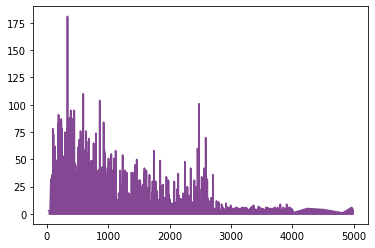

In [132]:
# Distancia de vuelos
df['Flight Distance'].value_counts().sort_index().plot.area() # Se cuentan los vuelos que tienen misma distancia y se grafica

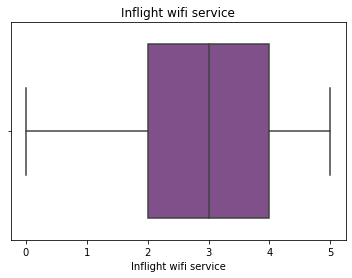

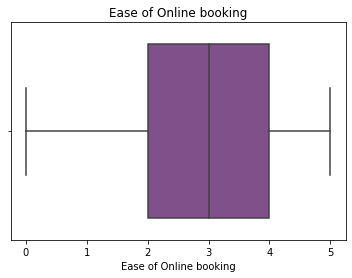

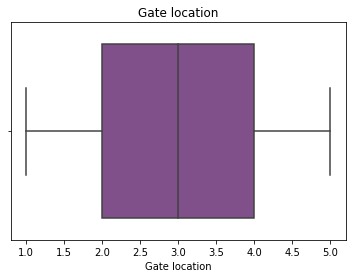

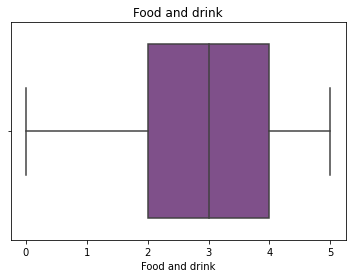

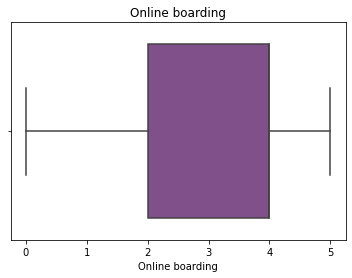

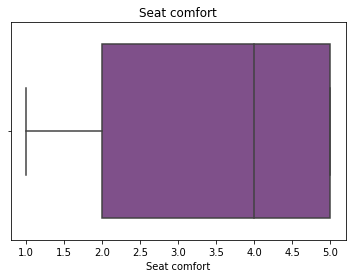

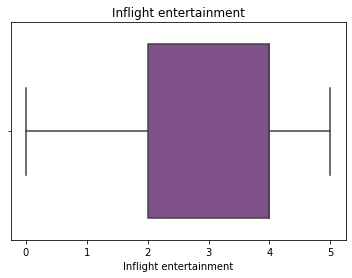

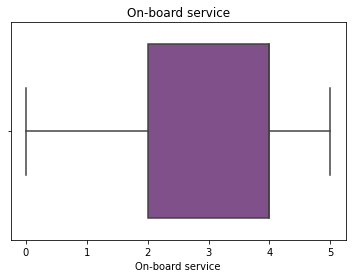

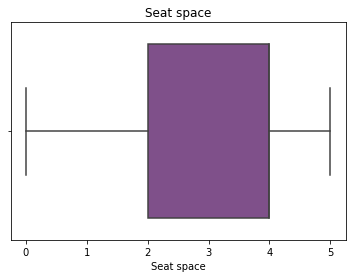

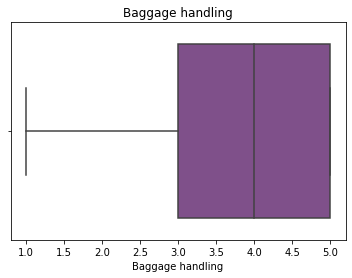

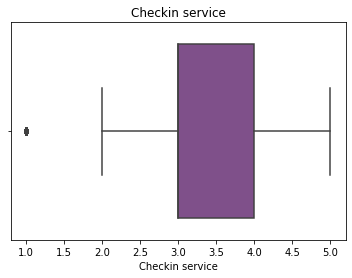

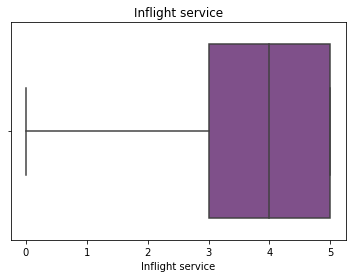

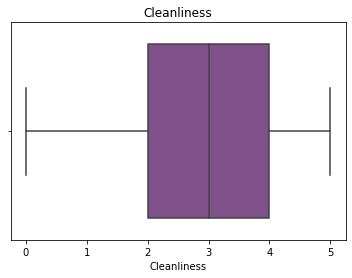

In [133]:
# Analisis de todos los parametros de la encuesta

# Funcion for para iterar sobre todos los campos
for x in variables: 
  plt.title(df[x].name) # Asignacion de titulo al grafico
  sns.boxplot(x=df[x]); # Asignacion de color y variable al grafico box plot
  plt.show() # Para mostrar todos los graficos

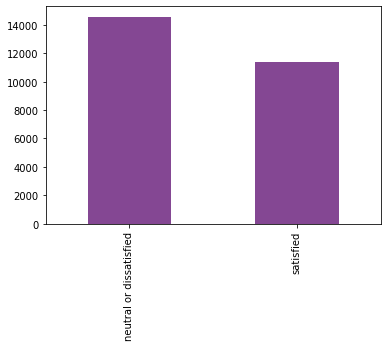

In [134]:
# Visualizacion de la satisfaccion
df['satisfaction'].value_counts().sort_index().plot(kind ='bar')

*Analisis bivariado*

---



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


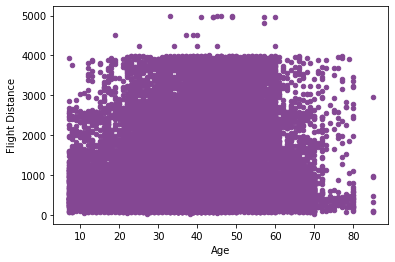

In [135]:
# Relacion entre edad y longitud del vuelo
df.plot.scatter(x='Age', y='Flight Distance')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


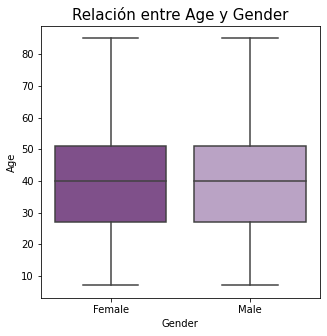

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


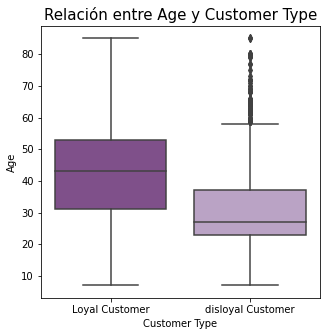

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


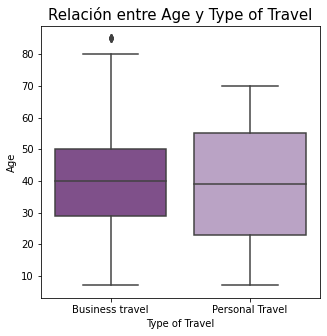

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


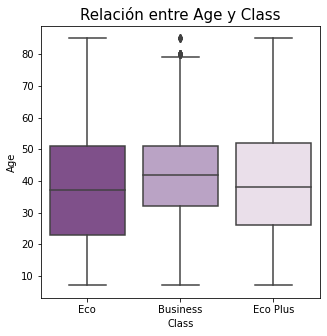

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


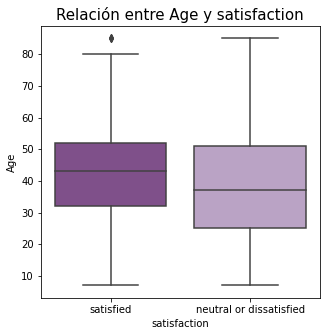

In [136]:
# Se visualiza la relacion entre la edad y otras variables categoricas

# Se asignan todos los campos requeridos a una unica variable
col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

# Se arma un for para analizar todas los campos de la nueva variable creada
for x in col_categorica: 
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df[x], df['Age']) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre Age y ' + str(df[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


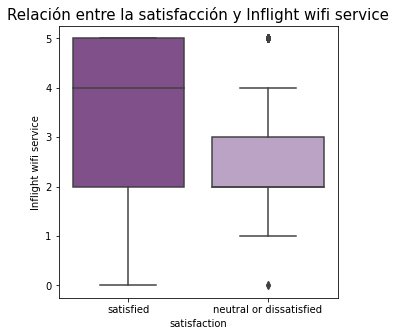

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


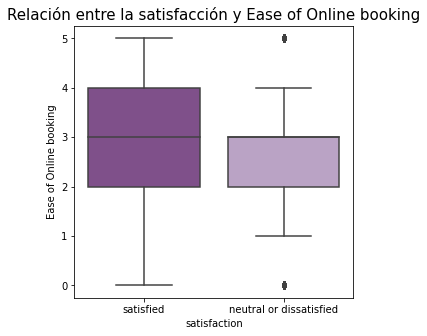

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


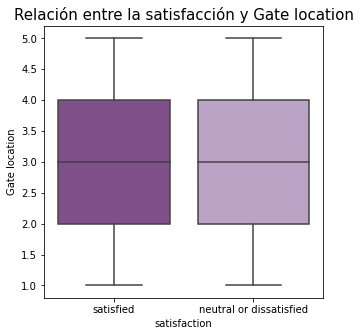

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


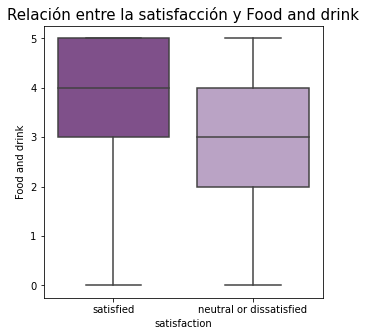

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


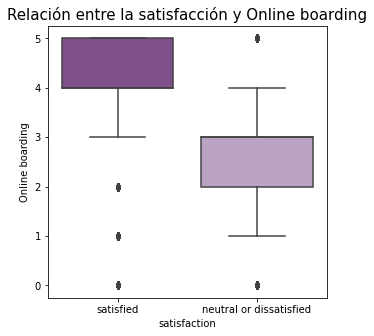

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


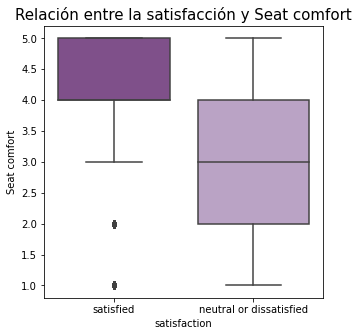

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


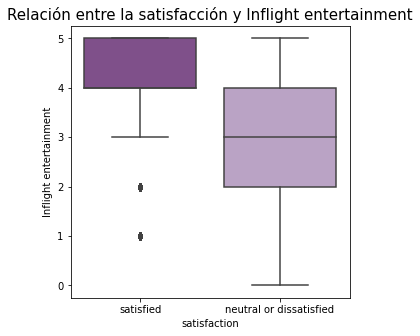

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


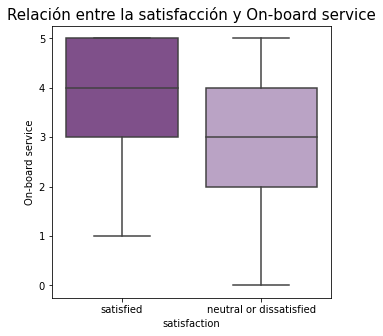

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


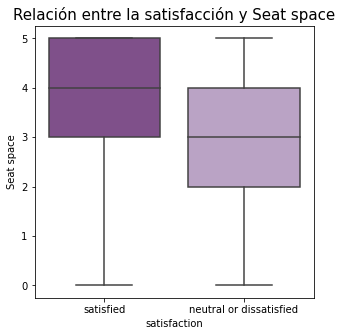

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


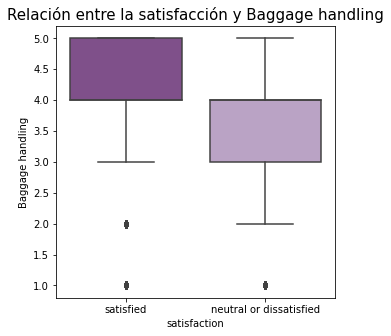

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


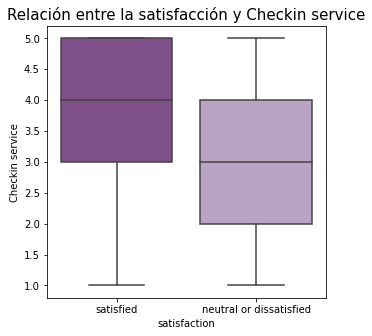

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


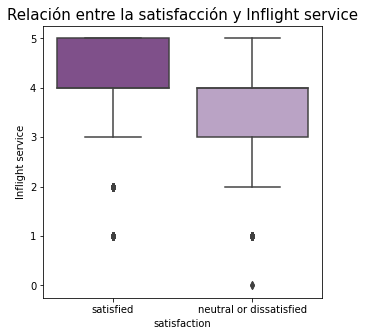

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


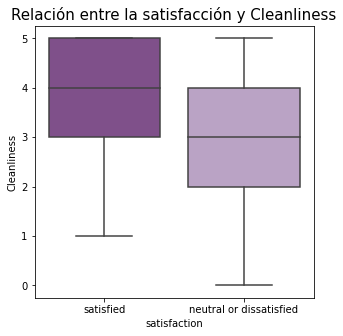

In [137]:
# Se visualiza la relacion entre la satisfacción y otras variables numéricas

# Se asignan todos los campos requeridos a una unica variable
variables = ['Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort','Inflight entertainment',  
'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness']

# Se arma un for para analizar todas los campos de la nueva variable creada
for x in variables: 
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df['satisfaction'], df[x]) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre la satisfacción y ' + str(df[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

La mayor diferencia se encuentra en la comodidad del asiento, si el asiento es cómodo es la satisfacción tiende a ser mayor

*Analisis multivariado*

---



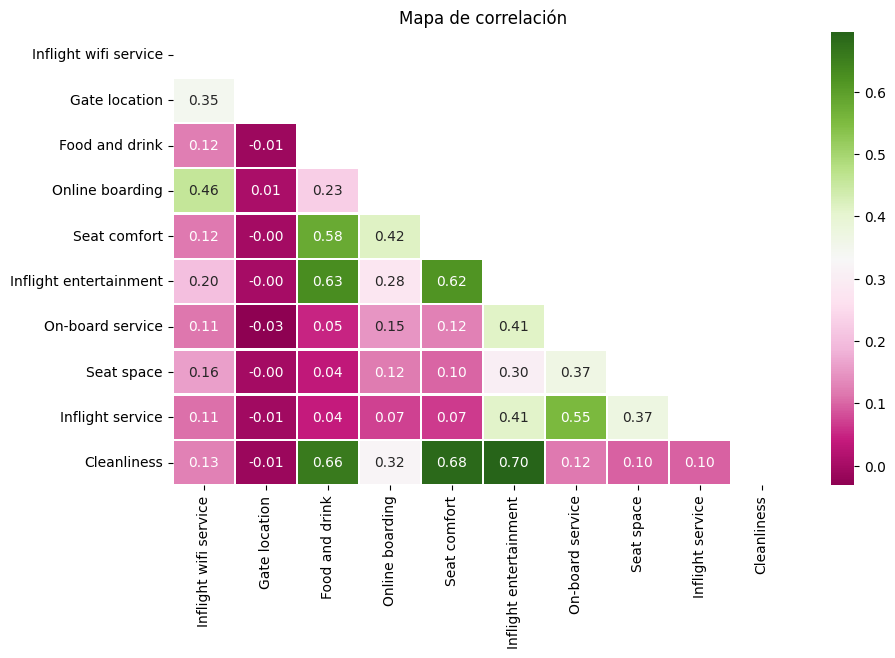

In [141]:
# Visualizacion de la matriz de correlacion, en donde se busca encontrar alguna correlacion entre las variables de la encuesta
variables_vuelo = ['Inflight wifi service', 'Gate location','Food and drink', 'Online boarding','Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Seat space', 'Inflight service', 'Cleanliness'] 

plt.figure(dpi = 100,figsize= (10,6)) # Se asigna el tamaño de la figura
mask = np.triu(np.ones_like(df[variables_vuelo].corr(),dtype = bool)) # Se seleccionan solo los datos debajo de la diagonal del mapa con la funcion triu 
sns.heatmap(df[variables_vuelo].corr(), mask = mask, fmt = ".2f", annot=True, lw=1, cmap = 'PiYG') # Se grafica el mapa de calor
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlación') # Se agrega titulo al mapa
plt.show() # Se visualiza el mapa

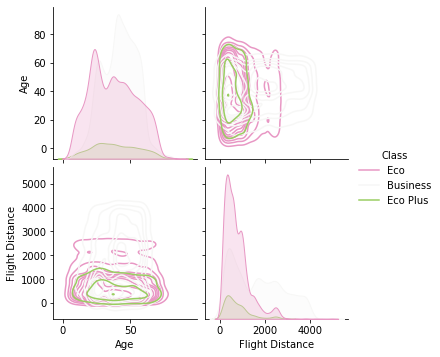

In [83]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target clase
df_relacion = df.loc[:, ['Age','Class','Flight Distance']] # Se seleccionan los campos requeridos del data frame
sns.pairplot(df_relacion ,hue = 'Class', palette = 'PiYG', kind="kde") # Se grafica en pairplot con el target clase para trazar relaciones por pares entre las variables edad y distancia de vuelo

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


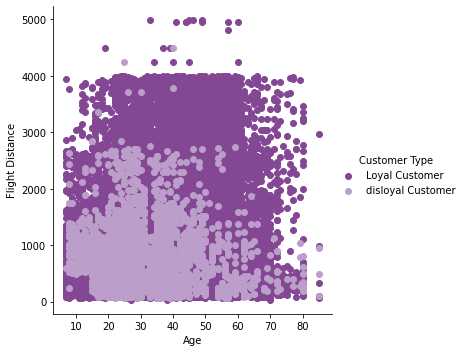

In [138]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target tipo de cliente
sns.FacetGrid(df, hue = 'Customer Type' , size = 5).map(plt.scatter,'Age','Flight Distance').add_legend(); 
plt.show() # Se visualiza el mapa

<Figure size 360x360 with 0 Axes>

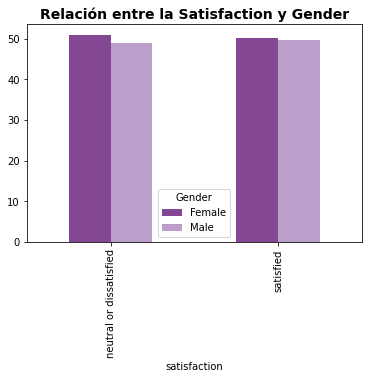

<Figure size 360x360 with 0 Axes>

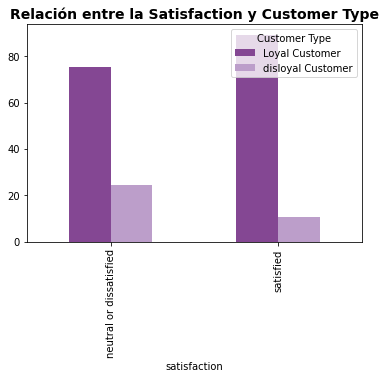

<Figure size 360x360 with 0 Axes>

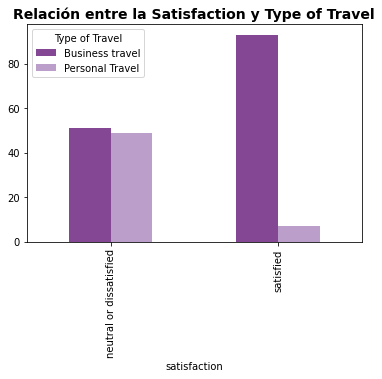

<Figure size 360x360 with 0 Axes>

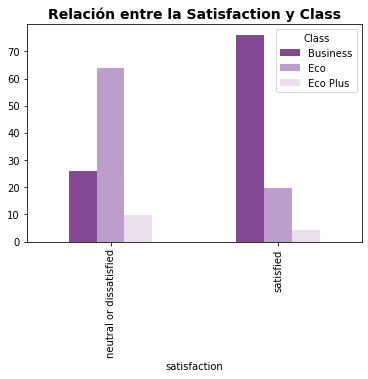

In [139]:
# Analisis del perfil del cliente en función de la satisfacción
perfil_cliente = ['Gender', 'Customer Type', 'Type of Travel','Class']
                   
for x in perfil_cliente: 
  plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
  pd.crosstab(index = df['satisfaction'], columns = df[x]).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')
  plt.title('Relación entre la Satisfaction y ' + str(df[x].name), fontsize = 14, fontweight='bold') # Se agrega el titulo al grafico
  plt.show()

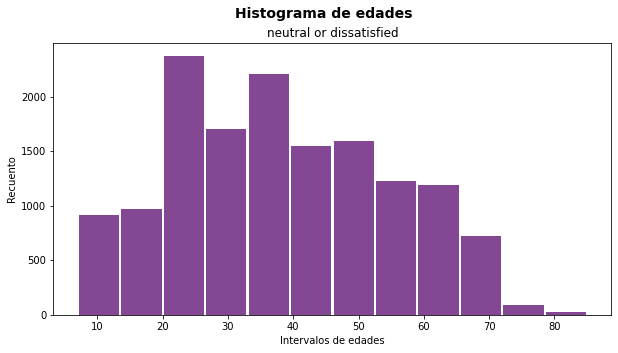

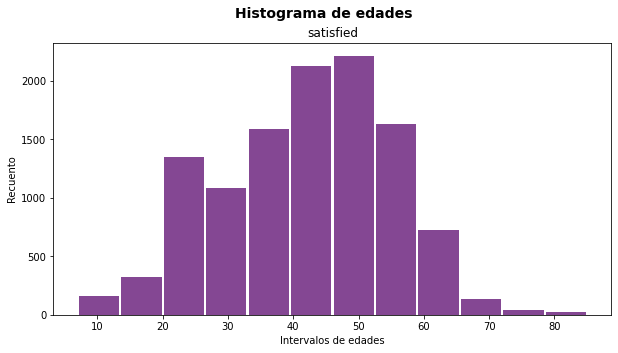

In [140]:
#Análisis de las edades en función de la satisfacción
for name, group in df.groupby('satisfaction'):
  fig, ax = plt.subplots(figsize=(10,5))
  ax.hist(group['Age'].values.flatten(), bins=12, rwidth=0.95) # se grafican los valores 
  fig.suptitle('Histograma de edades', fontsize=14, fontweight='bold')
  ax.set_title(label = name) #se pone titulo al grafico
  ax.set_xlabel('Intervalos de edades') #se pone nombre al eje x
  ax.set_ylabel('Recuento') #se pone nombre al eje x

# ***Algoritmos de clasificación***

---



In [96]:
#Importo las librerías
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [100]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[df2[variables_total].columns.difference(['satisfaction'])]
y = df2['satisfaction']

In [101]:
#Separo el dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training y 30% testing

print(f'Train shape : {X_train.shape}')
print(f'Test shape  : {X_test.shape}')

Train shape : (18183, 19)
Test shape  : (7793, 19)


Online boarding           0.181338
Inflight wifi service     0.144023
Class                     0.102354
Type of Travel            0.095397
Inflight entertainment    0.064279
Seat comfort              0.044523
Ease of Online booking    0.041838
Flight Distance           0.040390
Age                       0.040162
Seat space                0.039320
Customer Type             0.031434
On-board service          0.031350
Cleanliness               0.028760
Checkin service           0.028272
Baggage handling          0.024094
Inflight service          0.023925
Gate location             0.019980
Food and drink            0.012511
Gender                    0.006049
dtype: float64




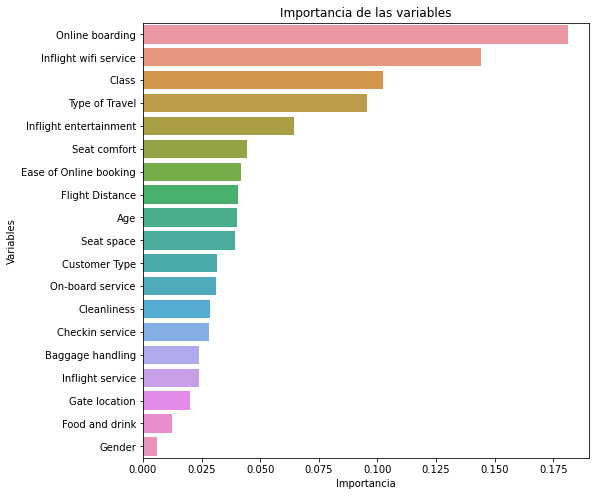

In [103]:
#Columnas del dataframe con variables numericas
variables_importancia = df2[variables_total].columns.difference(['satisfaction'])

#Creamos el random forest y lo entrenamos con las variables de entrenamiento
from sklearn.ensemble import RandomForestClassifier

clas_rd = RandomForestClassifier(random_state=11, 
                                 n_estimators=200,
                                 class_weight="balanced", 
                                 max_features="log2")
clas_rd.fit(X_train, y_train)


#Defino la importancia de las variables
feature_scores = pd.Series(clas_rd.feature_importances_, index = variables_importancia).sort_values(ascending = False)
print(feature_scores)
print('\n')


#Visualizo la importancia de las variables en un gráfico de barras
import seaborn as sns
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x = feature_scores, y = feature_scores.index)
ax.set_title("Importancia de las variables")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Importancia")
ax.set_ylabel("Variables")
plt.show()

In [104]:
#Elijo las 5 variables más importantes para realizar el algoritmo de clasificación (mayor a 0,06)
top_feature_scores = pd.Series(clas_rd.feature_importances_, index = variables_importancia).nlargest(n=5, keep='first')
variables_clas = list(top_feature_scores.index.values)
print(variables_clas)

['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel', 'Inflight entertainment']


In [105]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[df2[variables_clas].columns]
y = df2['satisfaction']

In [106]:
#Separo el dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training y 30% testing

print(f'Train shape : {X_train.shape}')
print(f'Test shape  : {X_test.shape}')

Train shape : (18183, 5)
Test shape  : (7793, 5)


*K-Nearest Neighbours*

---

In [107]:
#Importo MinMaxScaler para escalear los conjuntos de entrenamiento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

([<matplotlib.axis.XTick at 0x7f503e108210>,
 <a list of 21 Text major ticklabel objects>)

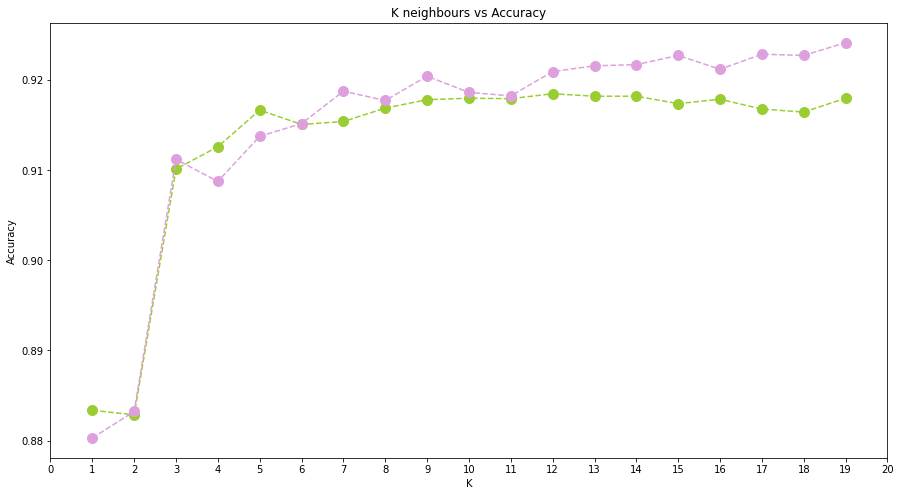

In [111]:
#Importo la librería para el algoritmo de clasificación
from sklearn.neighbors import KNeighborsClassifier

#Utilizo la tecnica de tecnica de Grid Search para validar el K óptimo
k_range = range(1, 20)
scores_train= []
scores_test= []
for k in k_range:
    clas_knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clas_knn.fit(X_train, y_train)
    scores_train.append(clas_knn.score(X_train, y_train))
    scores_test.append(clas_knn.score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot(k_range, scores_train, color='yellowgreen', linestyle='dashed', marker='o',markerfacecolor='yellowgreen', markersize=10)
plt.plot(k_range, scores_test, color='plum', linestyle='dashed', marker='o',markerfacecolor='plum', markersize=10)
plt.title('K neighbours vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [112]:
#El valor minimo optimo de vecinos es k = 3 que llega a una Accuracy del 91% para la data de Testing
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 8

#Consideraer que la distancia entre vecinos es con el parametro 'metric'probemos con otras distancia Minkowski 
clas_knn = KNeighborsClassifier(n_neighbors, metric = 'minkowski')
clas_knn.fit(X_train, y_train)

accuracy_train_knn = clas_knn.score(X_train, y_train)
accuracy_test_knn = clas_knn.score(X_test, y_test)

print('El Accuracy Train del modelo es de: {:.2f}'
      .format(accuracy_train_knn))
print('El Accuracy Test del modelo es de: {:.2f}'
      .format(accuracy_test_knn))

El Accuracy Train del modelo es de: 0.92
El Accuracy Test del modelo es de: 0.92


In [113]:
#Creo la variable de predicción en función de la respuesta del test
y_train_pred_knn = clas_knn.predict(X_train)
y_test_pred_knn = clas_knn.predict(X_test)

Matriz de Confusión: 
 [[4163  240]
 [ 401 2989]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


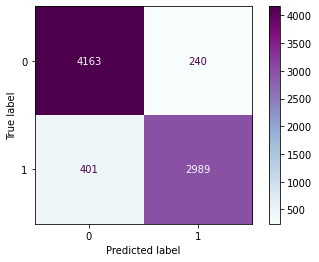

In [121]:
#Creamos la matriz de confusión para KNN
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_knn)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas_knn, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='BuPu')

In [122]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_knn)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_knn)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_knn)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_knn)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_knn)}')

El Accuracy del modelo es de: 0.9177466957525985

La Precision del modelo es de: 0.9256735831526789

El Recall del modelo es de: 0.8817109144542773

El valor de F1 del modelo es de: 0.9031575766732135


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4403
           1       0.93      0.88      0.90      3390

    accuracy                           0.92      7793
   macro avg       0.92      0.91      0.92      7793
weighted avg       0.92      0.92      0.92      7793



*Arbol de decision*

---

In [123]:
#Invoco el clasificador para el albol de decision
from sklearn.tree import DecisionTreeClassifier
clas_dt = DecisionTreeClassifier()

#Entreno el clasificador
clas_dt.fit(X_train, y_train)

#Creo la variable de predicción en función de la respuesta del test
y_train_pred_dt = clas_dt.predict(X_train)
y_test_pred_dt = clas_dt.predict(X_test)

Matriz de Confusión: 
 [[4175  228]
 [ 340 3050]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


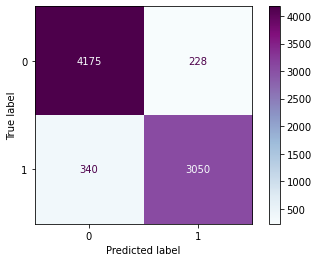

In [124]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_dt)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas_dt, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='BuPu')

In [ ]:
#Me fijo el accuracy del modelo
from sklearn import metrics
accuracy_train_dt = metrics.accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = metrics.accuracy_score(y_test, y_test_pred_dt)                               
print("El Accuracy Train del modelo es de:",accuracy_train_dt)
print("El Accuracy Test del modelo es de:",accuracy_test_dt)

El Accuracy Train del modelo es de: 0.926799758015729
El Accuracy Test del modelo es de: 0.9271140767355319


In [ ]:
#Comparamos el modelo del árbol de desición con knn
print('El árbol de desición es ' + str(accuracy_test_dt-accuracy_test_knn) + '% mas preciso que knn')

El árbol de desición es 0.009367380982933438% mas preciso que knn


In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_dt)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_dt)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_dt)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_dt)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_dt)}')

El Accuracy del modelo es de: 0.9271140767355319

La Precision del modelo es de: 0.9304453935326419

El Recall del modelo es de: 0.8997050147492626

El valor de F1 del modelo es de: 0.9148170365926814


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.92      0.95      0.94      4403
           1       0.93      0.90      0.91      3390

    accuracy                           0.93      7793
   macro avg       0.93      0.92      0.93      7793
weighted avg       0.93      0.93      0.93      7793



*Random Forest*

---

In [125]:
#Creamos el random forest y lo entrenamos con las variables de entrenamiento
from sklearn.ensemble import RandomForestClassifier

clas_rd = RandomForestClassifier(random_state=11, 
                                  n_estimators=200,
                                  class_weight="balanced", 
                                  max_features="log2")
clas_rd.fit(X_train, y_train)

#Realizamos una predicción con la variable de test
y_test_pred_rd = clas_rd.predict(X_test) 

#Calculamos la precision del random forest
from sklearn.metrics import accuracy_score
accuracy_test_rd = accuracy_score(y_test, y_test_pred_rd)
print('% de aciertos sobre el set de evaluación:',accuracy_test_rd)

% de aciertos sobre el set de evaluación: 0.9248043115616579


In [ ]:
#Comparamos el modelo del árbol de desición y knn con random forest
print('El random forest es ' + str(accuracy_test_rd-accuracy_test_dt) + '% mas preciso que el arbol de decision simple y ' 
      + str(accuracy_test_rd-accuracy_test_knn) + '% mas preciso que knn' )

El random forest es -0.0023097651738740455% mas preciso que el arbol de decision simple y 0.007057615809059392% mas preciso que knn


Matriz de Confusión: 
 [[4135  268]
 [ 318 3072]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


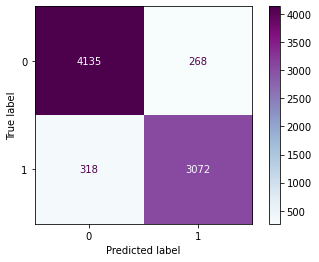

In [126]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_rd)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas_rd, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='BuPu')

In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_rd)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_rd)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_rd)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_rd)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_rd)}')

El Accuracy del modelo es de: 0.9248043115616579

La Precision del modelo es de: 0.9197604790419162

El Recall del modelo es de: 0.9061946902654867

El valor de F1 del modelo es de: 0.9129271916790491


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4403
           1       0.92      0.91      0.91      3390

    accuracy                           0.92      7793
   macro avg       0.92      0.92      0.92      7793
weighted avg       0.92      0.92      0.92      7793



*Support Vector Machine's*

---

In [127]:
#Invoco el clasificador para el SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clas_svc = SVC()

#Entreno el clasificador
clas_svc.fit(X_train, y_train)

#Creo la variable de predicción en función de la respuesta del test
y_test_pred_svc = clas_svc.predict(X_test)

Matriz de Confusión: 
 [[4016  387]
 [ 306 3084]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


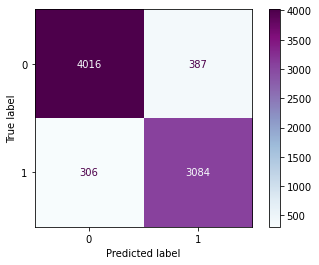

In [128]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_svc)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusion
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clas_svc, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='BuPu')

In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_svc)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_svc)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_svc)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_svc)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_svc)}')

El Accuracy del modelo es de: 0.9110740408058514

La Precision del modelo es de: 0.888504753673293

El Recall del modelo es de: 0.9097345132743363

El valor de F1 del modelo es de: 0.8989943156974202


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      4403
           1       0.89      0.91      0.90      3390

    accuracy                           0.91      7793
   macro avg       0.91      0.91      0.91      7793
weighted avg       0.91      0.91      0.91      7793



In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("            KNN      DT      RF     SVC")

# Accuracy
print(f"Accuracy    {round(accuracy_score(y_test, y_test_pred_knn),2)}    {round(accuracy_score(y_test, y_test_pred_dt),2)}    {round(accuracy_score(y_test, y_test_pred_rd),2)}    {round(accuracy_score(y_test, y_test_pred_svc),2)}")

# Precision
print(f"Precision   {round(precision_score(y_test, y_test_pred_knn),2)}    {round(precision_score(y_test, y_test_pred_dt),2)}    {round(precision_score(y_test, y_test_pred_rd),2)}    {round(precision_score(y_test, y_test_pred_svc),2)}")

# Recall
print(f"Recall      {round(recall_score(y_test,y_test_pred_knn),2)}    {round(recall_score(y_test,y_test_pred_dt),2)}    {round(recall_score(y_test,y_test_pred_rd),2)}    {round(recall_score(y_test,y_test_pred_svc),2)}")

# F1 score
print(f"F1          {round(f1_score(y_test, y_test_pred_knn),2)}     {round(f1_score(y_test, y_test_pred_dt),2)}    {round(f1_score(y_test, y_test_pred_rd),2)}    {round(f1_score(y_test, y_test_pred_svc),2)}")

            KNN      DT      RF     SVC
Accuracy    0.92    0.93    0.92    0.91
Precision   0.93    0.93    0.92    0.89
Recall      0.88    0.9    0.91    0.91
F1          0.9     0.91    0.91    0.9


Analizando todos los modelos, el que mejor se ajusta a los datos es el modelo de Desicion Tree.

# ***Algoritmos de optimización***

---

In [ ]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[df2[variables_total].columns.difference(['satisfaction'])]
y = df2['satisfaction']

In [ ]:
#Separacion en X e y
y = df2['satisfaction'].to_numpy() 
X = df2[df2[variables_total].columns.difference(['satisfaction'])].to_numpy()
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Seat space,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,
19556,0,0,52,0,1,160,5,3,4,3,4,3,5,5,5,5,2,5,5,1
90035,0,0,36,0,0,2863,1,3,1,5,4,5,4,4,4,4,3,4,5,1
12360,1,1,20,0,1,192,2,2,4,2,2,2,2,4,1,3,2,2,2,0
77959,1,0,44,0,0,3377,0,0,2,3,4,4,1,1,1,1,3,1,4,1
36875,0,0,49,0,1,1182,2,4,3,4,1,2,2,2,2,2,4,2,4,1


In [ ]:
#Dividir Train y Test - KFold
from sklearn.model_selection import KFold
kf_df2 = KFold(n_splits=5, random_state=0, shuffle=True)
train_kf, test_kf = list(kf_df2.split(X))[0]

X_train_kf = X[train_kf]
X_test_kf = X[test_kf]
y_train_kf = y[train_kf]
y_test_kf = y[test_kf]

In [ ]:
#Dividir Train y Test - StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf_df2 = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
train_skf, test_skf = list(skf_df2.split(X, y))[0]

X_train_skf = X[train_skf]
X_test_skf = X[test_skf]
y_train_skf = y[train_skf]
y_test_skf = y[test_skf]

Optimizo los dos modelos que mejor se ajustan a los datos: KNN y Descicion Tree

*Optimizacion Decision Tree*

---

In [ ]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV, KFold y StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clas_dt = DecisionTreeClassifier()
par = list(np.arange(0.0, 1., step=0.05))

#Uso KFold
cv_kf = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_kf_dt = GridSearchCV(estimator = clas_dt, param_grid = {'ccp_alpha':par}, cv = cv_kf)
_ = tunner_kf_dt.fit(X_train_kf, y_train_kf)

print('Decision Tree: \n')
print('Train score KFold: ' + str(tunner_kf_dt.score(X_train_kf, y_train_kf)))
print('Test score KFold:  ' + str(tunner_kf_dt.score(X_test_kf, y_test_kf)))


#Uso StratifiedKFold
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

tunner_skf_dt = GridSearchCV(estimator = clas_dt, param_grid = {'ccp_alpha':par}, cv = cv_skf)
_ = tunner_skf_dt.fit(X_train_skf, y_train_skf)

print('\n')
print('Train score StratifiedKFold: ' + str(tunner_skf_dt.score(X_train_skf, y_train_skf)))
print('Test score StratifiedKFold:  ' + str(tunner_skf_dt.score(X_test_skf, y_test_skf)))

Decision Tree: 

Train score KFold: 1.0
Test score KFold:  0.9299461123941494


Train score StratifiedKFold: 1.0
Test score StratifiedKFold:  0.9324480369515011


*Oprimizacion Random Forest*

---

In [ ]:
#Entrenar el modelo de Random Forest y encontrar el mejor alpha con GridSearchCV y KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clas_rd = RandomForestClassifier()
par = list(np.arange(0.0, 1., step=0.05))


#Uso KFold
cv_kf = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_kf_rd = GridSearchCV(estimator = clas_rd, param_grid = {'ccp_alpha':par}, cv = cv_kf)
_ = tunner_kf_rd.fit(X_train_kf, y_train_kf)

print('Random Forest: \n')
print('Train score KFold: ' + str(tunner_kf_rd.score(X_train_kf, y_train_kf)))
print('Test score KFold:  ' + str(tunner_kf_rd.score(X_test_kf, y_test_kf)))


#Uso StratifiedKFold
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

tunner_skf_rd = GridSearchCV(estimator = clas_rd, param_grid = {'ccp_alpha':par}, cv = cv_skf)
_ = tunner_skf_rd.fit(X_train_skf, y_train_skf)

print('\n')
print('Train score StratifiedKFold: ' + str(tunner_skf_rd.score(X_train_skf, y_train_skf)))
print('Test score StratifiedKFold:  ' + str(tunner_skf_rd.score(X_test_skf, y_test_skf)))

Random Forest: 

Train score KFold: 1.0
Test score KFold:  0.955735180908391


Train score StratifiedKFold: 1.0
Test score StratifiedKFold:  0.9566974595842956


El modelo optimizado que mejor se ajusta a las variables es el de Random Forest, teniendo un score mayor con KFold. Dado que los valores son muy altos podrita tratarse de un overfitting y decidimos utilizar el modelo de Desicion Tree.